# Simulate Count from Sample
Using Julia, fit a data sample to a Poisson distribution comprised of a number of trials (draws) of your choosing. The default number of trials is 10,000. A Poisson distribution descibes the number of independent events occurring within a unit time interval, given the average rate of occurrence λ.

## 0. Import packages and define SimulateCountsFromSample function
Install (if necessary) and import the functions necessary to run the SimulateCountsFromSample function. Then define the function for later use. 

In [10]:
# using Pkg
# Pkg.add("DataFrames")
# Pkg.add("Distributions")
# Pkg.add("Plots")
# Pkg.add("PlotThemes")
# Pkg.add("KernelDensity")

using DataFrames
using Distributions
using Plots
using PlotThemes
using KernelDensity
gr()
theme(:bright)

function SimulateCountsFromSample(
    dataframe::DataFrame,
    column_name::String,
    trials::Integer=10000,
    show_plot::Bool=true
)
    # Get parameters for simulation
    Param_PoissonDistSim = fit(Poisson, dataframe[:, column_name])
    println("The mean rate of occurences (λ) used in simulation: ", Param_PoissonDistSim.λ)
    # Conduct simulation
    Arr_PoissonDistSim = rand(Param_PoissonDistSim, trials, 1)
    DF_PoissonDistSim = DataFrame(Arr_PoissonDistSim, :auto)
    # Get kernel density estimates for sample and simulation
    kde_sample = kde(dataframe[:, column_name])
    kde_simulation = kde(DF_PoissonDistSim[:, "x1"])
    # Generate plot if requested by user
    if show_plot
        title_for_plot = "Simulated Outcome (Poisson Distribution)"
        p = histogram(
            DF_PoissonDistSim[:, "x1"], 
            bins= :scott, 
            fillalpha= 0.4, 
            label= "Simulated Outcome", 
            title= title_for_plot, 
            xlabel= column_name
        )
        plot!(
            kde_simulation.x, 
            kde_simulation.density .* length(DF_PoissonDistSim[:, "x1"])  .* 0.8, 
            linewidth= 3, 
            color= 1, 
            label= "Density of Simulation"
        )
        plot!(
            kde_sample.x, kde_sample.density .* length(DF_PoissonDistSim[:, "x1"])  .* 0.8, 
            alpha= 0.6,
            linewidth= 3, 
            color= 2, 
            label= "Density of Sample"
        )
        display(p)
    end
    # Return simulation results
    return DF_PoissonDistSim
end

SimulateCountsFromSample (generic function with 3 methods)

## 1. Import your data sample
First, import your data sample into Julia. This example uses a randomly generated dataset.

In [6]:
Arr_RandomNumbers = rand(0:10, 50, 1)
DF_RandomNumbers = DataFrame(Arr_RandomNumbers, :auto)

,x1
,Int64
1,1
2,10
3,7
4,2
5,3
6,6
7,5
8,6
9,7


## 2. Use the SimulateCountsFromSample function
Use the SimulateCountsFromSample function to simulate a Bernoulli distribution from your sample dataset.

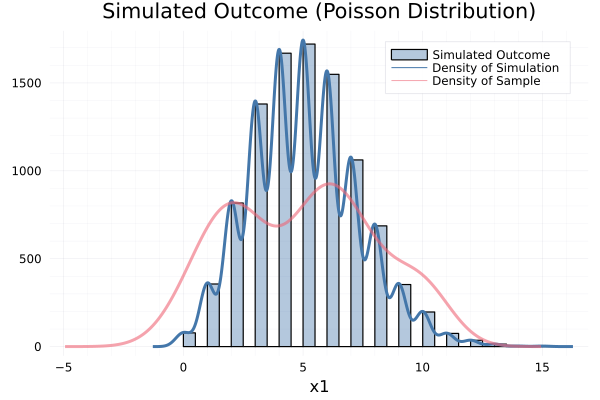

The mean rate of occurences (λ) used in simulation: 5.0


,x1
,Int64
1,8
2,6
3,3
4,4
5,4
6,7
7,5
8,3
9,4


In [11]:
DF_Sim = SimulateCountsFromSample(DF_RandomNumbers, "x1")